# Exploración inicial de los datos

A continuación se presenta la exploración inicial del conjunto de datos acerca del data set **EvaluacionAgro.cvs** correspondiente a evaluaciones agropecuarias en los departamentos de Boyacá y Cundinamarca

In [7]:
#importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# importacion de los datos a df_agro
df_agro = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro.csv',sep=';')
df_agro.head()

,codDaneDpto,Dpto,codDaneMunicipio,Municipio,desagregacionCultivo,Cultivo,cicloDelCultivo,grupoCultivo,Subgrupo,Anio,Periodo,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa,codCultivo,nombreCientificoCultivo,estadoFisicoCultivo
0,15,Boyacá,15001,Tunja,Fresa,Fresa,Permanente,Frutales,Demas frutales,2019,C,3,3,30,10,2042700,Fragaria vesca,En fresco
1,15,Boyacá,15001,Tunja,Avena,Avena,Transitorio,Cereales,Cereales,2019,A,160,160,480,3,1010200,Avena sativa,En fresco
2,15,Boyacá,15001,Tunja,Cebada,Cebada,Transitorio,Cereales,Cereales,2019,A,20,20,60,3,1010300,Hordeum vulgare,En fresco
3,15,Boyacá,15001,Tunja,Maíz Tradicional,Maíz,Transitorio,Cereales,Cereales,2019,A,180,180,360,2,1010497,Zea mays,En fresco
4,15,Boyacá,15001,Tunja,Cebolla De Bulbo,Cebolla De Bulbo,Transitorio,Hortalizas,Hortalizas de raíz,2019,A,120,120,2400,20,1051100,Allium cepa,En fresco


In [9]:
df_agro[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   areaSembradaHa    18337 non-null  object
 1   areaCosechadaHa   18337 non-null  object
 2   produccionTon     18337 non-null  object
 3   rendimientoTonHa  18337 non-null  object
dtypes: object(4)
memory usage: 573.2+ KB


al visualizar los datos se detalla que estos estan en el formato incorrecto, estas medidas corresponde a datos de tipo numerico por lo tanto de procede a dar formato

### *Datos Númericos*
* areaSembradaHa
* areaCosechadaHa
* produccionTon
* rendimientoTonHa
* Anio 
* Periodo

#### *Anio*

2022    4931
2021    4680
2020    4431
2019    4295
Name: Anio, dtype: int64


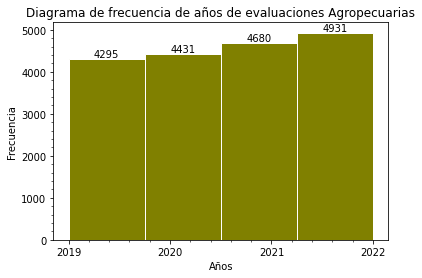

In [10]:
print(df_agro['Anio'].value_counts())
_,_,barraA = plt.hist(df_agro['Anio'],bins=4,edgecolor='white',color='olive')
plt.bar_label(barraA)
plt.title('Diagrama de frecuencia de años de evaluaciones Agropecuarias')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.minorticks_on()
plt.xticks(range(2019, 2023)) # ajuste de la escala en el eje x
plt.show()

#### *areaSembradaHa*

In [11]:
#correción de los datos
df_agro['areaSembradaHa'] = df_agro['areaSembradaHa'].str.replace(',', '.')
#asignación de formato
df_agro['areaSembradaHa']= pd.to_numeric(df_agro['areaSembradaHa'],errors='coerce')
#descripcion general
df_agro['areaSembradaHa'].describe()


count    18337.000000
mean        91.750290
std        369.467084
min          0.000000
25%          5.000000
50%         15.000000
75%         50.000000
max       9123.000000
Name: areaSembradaHa, dtype: float64

In [12]:
ls = df_agro['areaSembradaHa'].quantile(0.75) +1.5*(df_agro['areaSembradaHa'].quantile(0.75) - df_agro['areaSembradaHa'].quantile(0.25))
ls

117.5

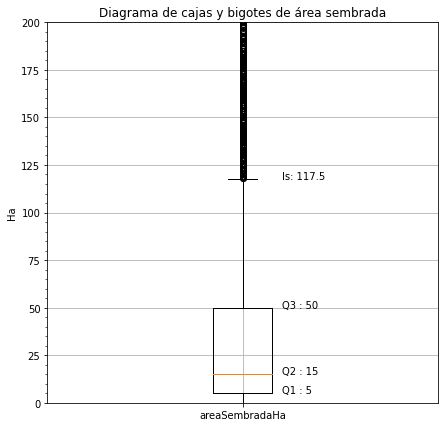

In [13]:
plt.figure(figsize=(7,7))
plt.boxplot(x = df_agro['areaSembradaHa'],labels=['areaSembradaHa'])
plt.annotate(f'ls: {ls}',xy=(1.1,117.5))
plt.annotate('Q1 : 5',xy=(1.1,5))
plt.annotate('Q2 : 15',xy=(1.1,15))
plt.annotate('Q3 : 50',xy=(1.1,50))
plt.ylim(0,200)
plt.grid()
plt.title('Diagrama de cajas y bigotes de área sembrada')
plt.ylabel('Ha')
plt.minorticks_on()
plt.show()

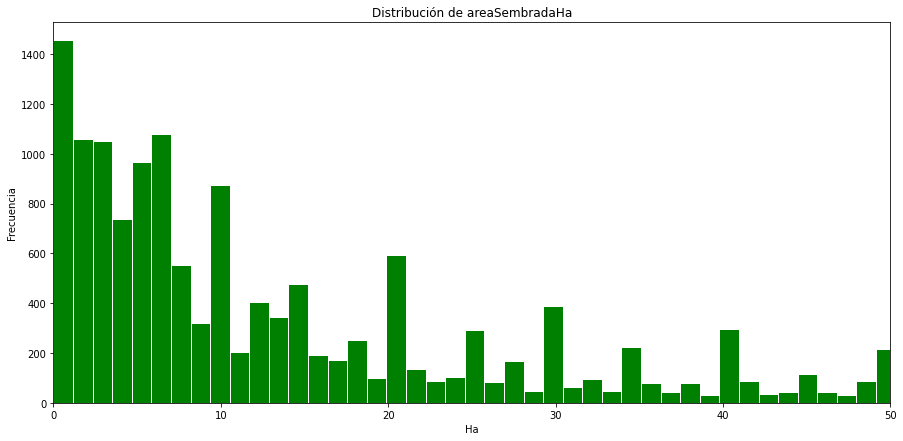

In [14]:
#grafico de frecuencia de areaSembradaHa
df_areaSembrada = df_agro[df_agro['areaSembradaHa']<=117]
plt.figure(figsize=(15,7))
plt.hist(df_areaSembrada['areaSembradaHa'],color='green',edgecolor='white',bins=100)
plt.xlim(0,50)
plt.title('Distribución de areaSembradaHa')
plt.xlabel('Ha')
plt.ylabel('Frecuencia')
plt.show()

#### *areaCosechadaHa*

In [15]:
#cambio de formato
df_agro['areaCosechadaHa'] = pd.to_numeric(df_agro['areaCosechadaHa'].str.replace(',','.'))
estadistica = df_agro['areaCosechadaHa'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

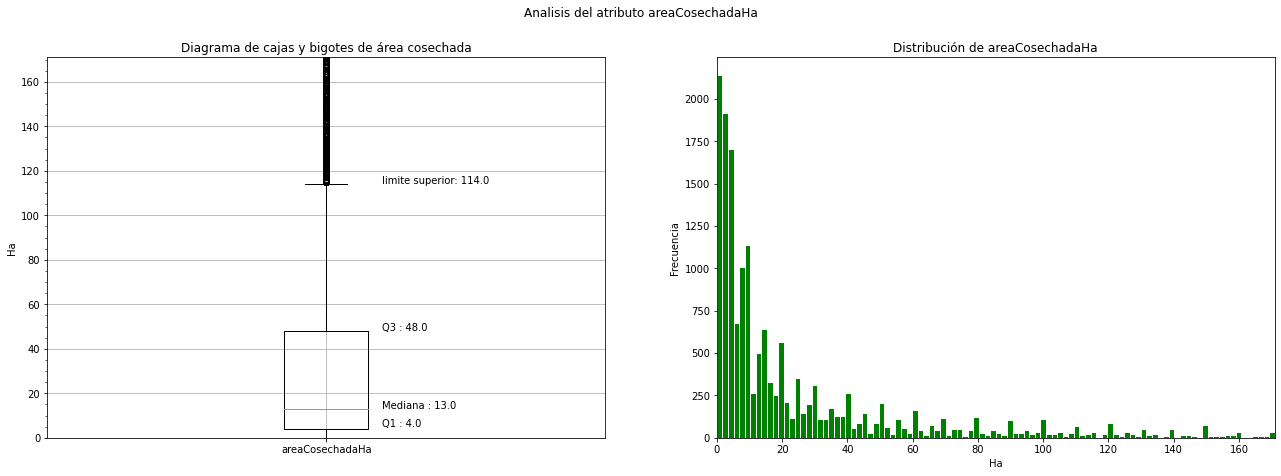

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo areaCosechadaHa')
ax[0].boxplot(x = df_agro['areaCosechadaHa'],labels=['areaCosechadaHa'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de área cosechada')
ax[0].set_ylabel('Ha')
ax[0].minorticks_on()

df_area = df_agro[df_agro['areaCosechadaHa']<=ls*1.5]

ax[1].hist(df_area['areaCosechadaHa'],color='green',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls*1.5)
ax[1].set_title('Distribución de areaCosechadaHa')
ax[1].set_xlabel('Ha')
ax[1].set_ylabel('Frecuencia')
plt.show()

#### *produccionTon*

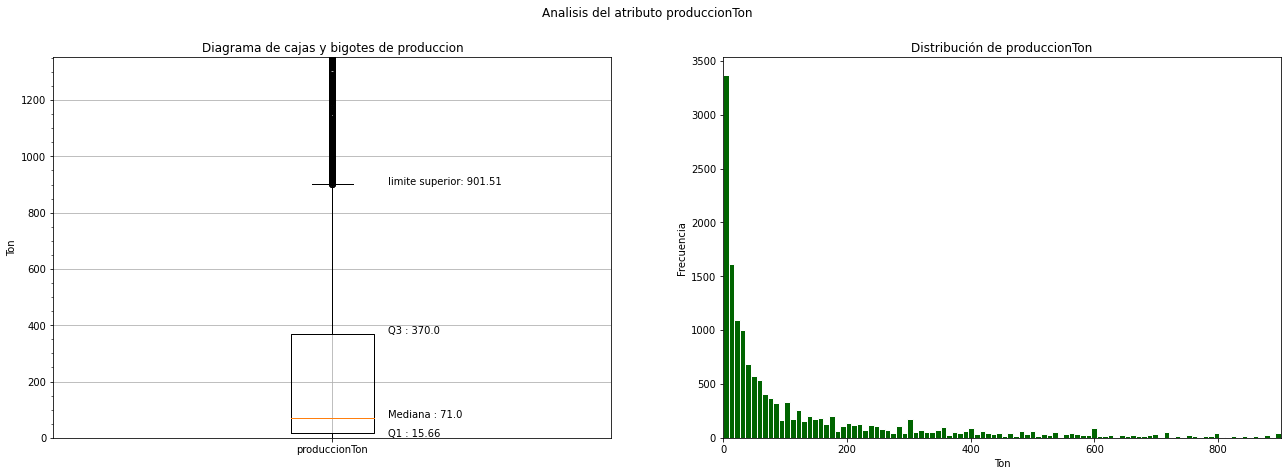

In [17]:
#cambio de formato
df_agro['produccionTon'] = pd.to_numeric(df_agro['produccionTon'].str.replace(',','.'))
estadistica = df_agro['produccionTon'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo produccionTon')
ax[0].boxplot(x = df_agro['produccionTon'],labels=['produccionTon'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de produccion')
ax[0].set_ylabel('Ton')
ax[0].minorticks_on()

df_areaSembrada = df_agro[df_agro['produccionTon']<=ls]

ax[1].hist(df_areaSembrada['produccionTon'],color='darkgreen',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls)
ax[1].set_title('Distribución de produccionTon')
ax[1].set_xlabel('Ton')
ax[1].set_ylabel('Frecuencia')
plt.show()

#### *rendimientoTonHa*

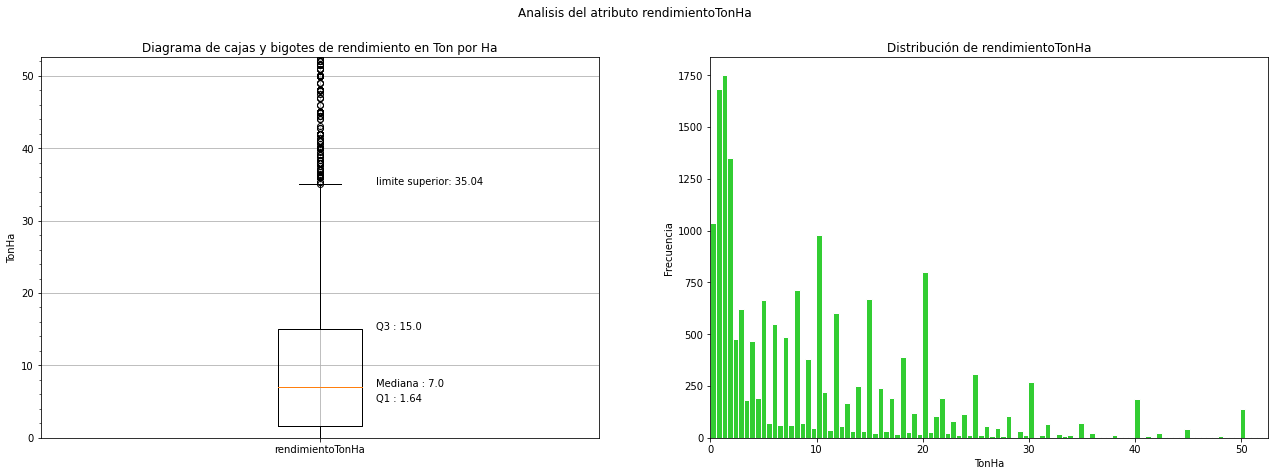

In [18]:
#cambio de formato
df_agro['rendimientoTonHa'] = pd.to_numeric(df_agro['rendimientoTonHa'].str.replace(',','.'))
estadistica = df_agro['rendimientoTonHa'].describe()
ls = estadistica[6] + 1.5*(estadistica[6] - estadistica[4])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,7))
plt.suptitle('Analisis del atributo rendimientoTonHa')
ax[0].boxplot(x = df_agro['rendimientoTonHa'],labels=['rendimientoTonHa'])
ax[0].annotate(f'limite superior: {ls}',xy=(1.1,int(ls)))
ax[0].annotate(f'Q1 : {estadistica[4]}',xy=(1.1,5))
ax[0].annotate(f'Mediana : {estadistica[5]}',xy=(1.1,estadistica[5]))
ax[0].annotate(f'Q3 : {estadistica[6]}',xy=(1.1,estadistica[6]))
ax[0].set_ylim(0,ls*1.5)
ax[0].grid()
ax[0].set_title('Diagrama de cajas y bigotes de rendimiento en Ton por Ha')
ax[0].set_ylabel('TonHa')
ax[0].minorticks_on()

df_areaSembrada = df_agro[df_agro['rendimientoTonHa']<=ls*1.5]

ax[1].hist(df_areaSembrada['rendimientoTonHa'],color='limegreen',edgecolor='white',bins=100)
ax[1].set_xlim(0,ls*1.5)
ax[1].set_title('Distribución de rendimientoTonHa')
ax[1].set_xlabel('TonHa')
ax[1].set_ylabel('Frecuencia')
plt.show()

Estadisticos descriptivos de las variables numericas

In [19]:
df_agro[['areaSembradaHa','areaCosechadaHa','produccionTon','rendimientoTonHa']].describe()

,areaSembradaHa,areaCosechadaHa,produccionTon,rendimientoTonHa
count,18337.000000,18337.000000,18337.000000,18337.000000
mean,91.750290,85.428148,1751.153486,11.286363
std,369.467084,349.666554,14868.934487,16.184539
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,15.660000,1.640000
50%,15.000000,13.000000,71.000000,7.000000
75%,50.000000,48.000000,370.000000,15.000000
max,9123.000000,9111.000000,576000.000000,640.000000


In [20]:
df_agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codDaneDpto              18337 non-null  int64  
 1   Dpto                     18337 non-null  object 
 2   codDaneMunicipio         18337 non-null  int64  
 3   Municipio                18337 non-null  object 
 4   desagregacionCultivo     18337 non-null  object 
 5   Cultivo                  18337 non-null  object 
 6   cicloDelCultivo          18337 non-null  object 
 7   grupoCultivo             18337 non-null  object 
 8   Subgrupo                 18337 non-null  object 
 9   Anio                     18337 non-null  int64  
 10  Periodo                  18337 non-null  object 
 11  areaSembradaHa           18337 non-null  float64
 12  areaCosechadaHa          18337 non-null  float64
 13  produccionTon            18337 non-null  float64
 14  rendimientoTonHa      

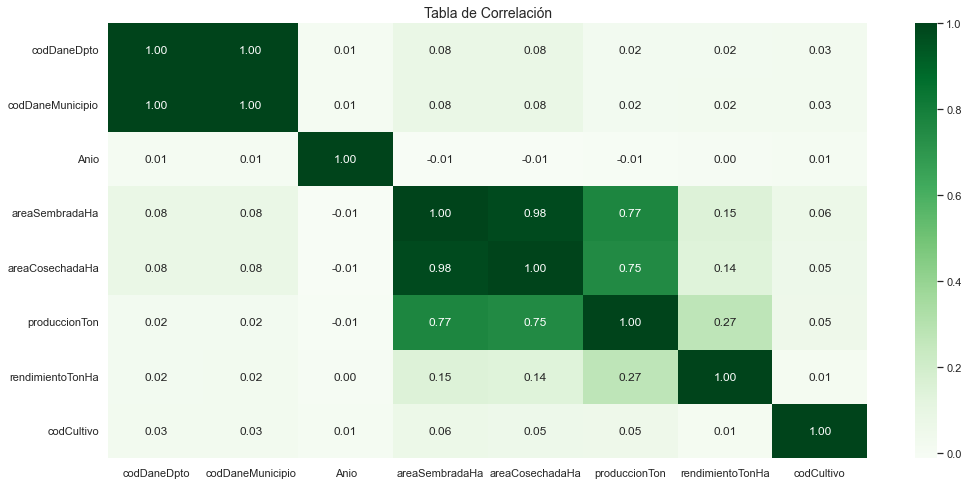

In [21]:
correlacion = df_agro.corr()
sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(correlacion,annot=True,fmt=".2f",cmap="Greens")
plt.title('Tabla de Correlación',fontsize=14)
plt.show()

Eliminación de datos redundantes

In [22]:
df_agro.drop(columns=['codDaneDpto','codDaneMunicipio','codCultivo'],inplace=True)
df_agro.to_csv('..\Bases de datos\EvaluacionAgro01.csv',index=False,sep=';')